In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

churn_data=pd.read_csv('data/churn.csv', sep=',')
churn_data.drop(columns=['RowNumber'], axis=0, inplace=True)
churn_data.head()

# RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
# CustomerId — идентификатор клиента
# Surname — фамилия клиента
# CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
# Geography — страна клиента (банк международный)
# Gender — пол клиента
# Age — возраст клиента
# Tenure — сколько лет клиент пользуется услугами банка
# Balance — баланс на счетах клиента в банке
# NumOfProducts — количество услуг банка, которые приобрёл клиент
# HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
# IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
# EstimatedSalary — предполагаемая заработная плата клиента
# Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Задание 9.1
##### Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

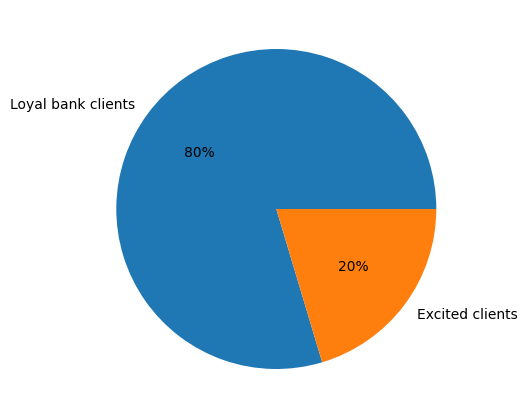

In [2]:
# Воспользовался круговой диаграммой
value_exited=churn_data['Exited'].value_counts()
fig=plt.figure(figsize=(4,4))
axes=fig.add_axes([1,1,1,1])
axes.pie(
    x=value_exited,
    labels=('Loyal bank clients','Excited clients'),
    autopct='%.0f%%',
    explode=[0,0]
); 

Комментарий к графику: вроде это лишь статистическая составляющая, поэтому решил воспользоваться круговой диаграммой. Что касается соотношения - на каждого ушедшего клиента приходится четверо активных.

Задание 9.2
##### Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

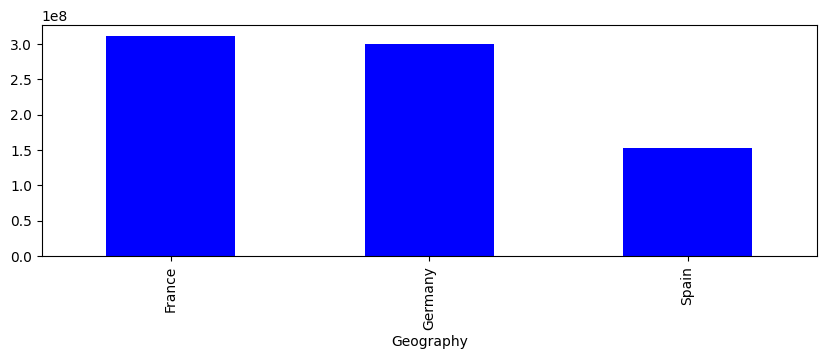

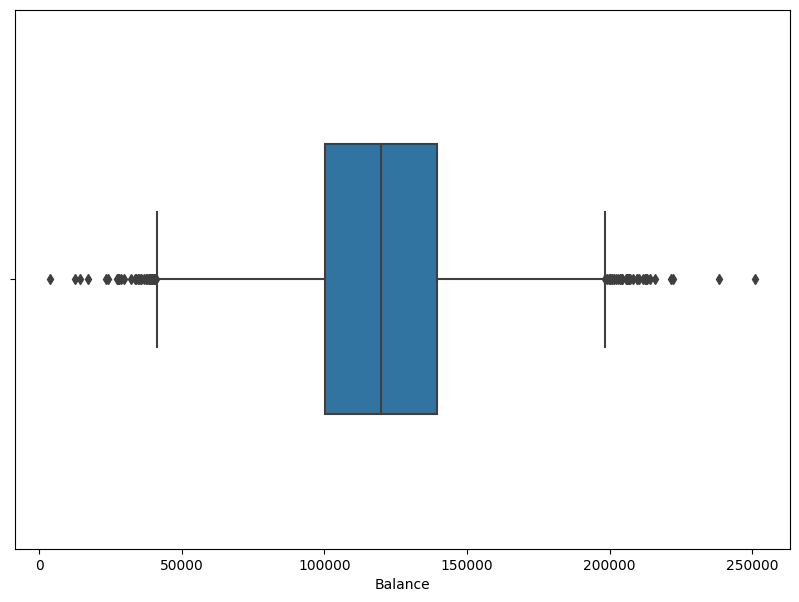

In [3]:
# Так как не понял какого рода мне необходимо искать информацию решил воспользоваться столбчатой диаграмой, вроде как необходимо отобразить один признак. 
# Чуть позже вернулся к  этому заданию и решил ещё глянуть распределение с помощью коробчатой диаграммы

mask1=churn_data['Balance'] > 2500
balance_client = churn_data[mask1]
balance_client = churn_data[mask1].groupby(['Geography'])['Balance'].sum()
balance_client.plot(
    kind='bar',
    grid=False,
    figsize=(10, 3),
    colormap='winter'
); 

fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=churn_data[mask1],
    x='Balance',
    orient='h',
    width=0.5
)


Комментарий к графикам: судя по столбчатой диаграмме суммарный баланс жителей из Испании в два раза меньше чем суммарные балансы жителей Франции и Германии. Но что конкретно мне показывает коробчатая диаграмма, я так и не понял, вижу только довольно таки плавное соотношение верхнего и нижнего квартилей. Даже после вылазки в гугл так и не понял как "читать" коробчатую диграмму...

Задние 9.3
##### Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

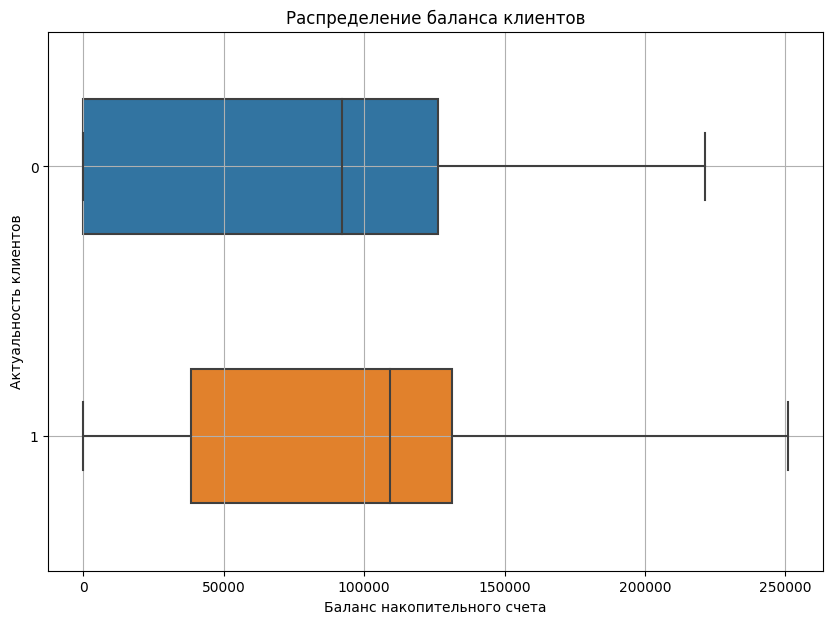

In [31]:
# Воспользуемся коробчатой диаграммой

fig = plt.figure(figsize=(10,7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.5
)
boxplot.set_title('Распределение баланса клиентов');
boxplot.set_xlabel('Баланс накопительного счета');
boxplot.set_ylabel('Актуальность клиентов');
boxplot.grid()

Комментарий к графику: из данного графика вижу только тот факт, что у ушедших клиентов медиана баланса выше чем у лояльных клиентов, так же у статистике по ушедшим клиентам присутствует нижний квартиль в отличии от лояльных клиентов. Но ответить на вопрос, что не нравиться клиентам и почему они уходят, я из этого графика немогу

Задание 9.4
##### Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?